## Sigmoid neurons

Just like a perceptron the sigmoid neurons has weights ($x1, x2, ... x_n$) and a $bias$. But, instead of outputing 0 or 1 the output is passed through the $sigmoid \space function$. $\sigma(w \cdot x + b)$.

$$ \sigma(w \cdot j + b) = \frac{1}{1 + e^{-z}}, z = w \cdot x + b $$
$$ w \cdot b = \sum_{j} x_j \cdot w_j + b $$

The sigmoid function can be vizualized below.

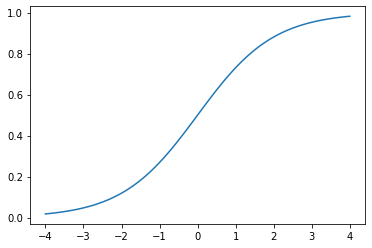

In [40]:
import numpy as np
import matplotlib.pyplot as plt

sigmoid = lambda z: 1 / (1 + np.e**-z)
x = np.linspace(-4, 4, 100)
y = sigmoid(x)

fig, axes = plt.subplots()

plt.plot(x, y)

 The shape of the sigmoid function is what's important. The exact shape doesn't really matter but it will simplify the calculations. If we make small changes to the weights and biases so that the sigmoid function is in that region of smoothness we can control the output. So changes in $\Delta w$ or $\Delta b$ will cause small changes in $\Delta output$. Mathematically

$$ \Delta output \approx \sum_{j} \frac{\partial output}{\partial w_j} \cdot \Delta w_j + \frac{\partial output}{\partial b} \cdot \Delta b $$

$ x - training \space input$
 
$ y = y(x) - desired \space output $

When we need is an algorithm that will adjust the weights and biases to produce an output close to the desired output. To quantify this we use a **cost function**(aka loss or objective).

$$ C(w, b) = \frac{1}{2n} \sum_x || y(x) - a ||^2 $$
$ w - all \space weights $

$ b - all \space biases $

$ a - output \space when \space x \space input $

This particular *cost function* is known as *the quadratic cost function* or *mean squared error* or just MSE.

Minimizing the cost function is finding the weights and biases that will reduce that cost function. Gradient descent is a common technique used to minize a function.

Assuming C is a function that depends on v1, v2 we know from calculus:

$$ \Delta C \approx \frac{\partial C }{\partial v1} \cdot \Delta v1 + \frac{\partial C }{\partial v2} \cdot \Delta v2 $$

So we are going to find v1, v2 to make the $ \Delta C $ negative.

We can define $ \Delta v $ as the vector of changes.

$$ \Delta v = (\Delta v1, \Delta v2)^T $$

And define the partial derivatives with respect to each variable as the gradient. That's what is the gradient in fact.

$$ \nabla C = (\frac{\partial C}{\partial v1}, \frac{\partial C}{\partial v2})^T  $$

With all the definitions we can express the equation for $ \Delta C $ as a dot product.

$$ \Delta C \approx \nabla C \cdot \Delta v $$

This equation is very important because it shows that if we choose $ \Delta v $ to be $ \eta \cdot \nabla C  $ ($\eta$ known as *learning rate*) then we will be sure that the $ \Delta C $ will alway decrease never increase.

$$ \Delta v = -\eta \cdot \nabla C $$
$$ \Delta C \approx - \eta \cdot \nabla C = - \eta || \nabla C ||^2 $$

because $ || \nabla C ||^2  \ge 0  $ within the boundaries of our approximation.

THat is we will compute a value for $ \Delta v $ and move the ball postition $ v $ by the amount.

$$ v \rightarrow v' = v - \eta \nabla C $$

In [41]:
"""
mnist_loader
~~~~~~~~~~~~
A library to load the MNIST image data.  For details of the data
structures that are returned, see the doc strings for ``load_data``
and ``load_data_wrapper``.  In practice, ``load_data_wrapper`` is the
function usually called by our neural network code.
"""
#### Libraries
# Standard library
import random

# Third-party libraries
import numpy as np

#### Libraries
# Standard library
import pickle as cPickle
import gzip

# Third-party libraries
import numpy as np

def load_data():
    """Return the MNIST data as a tuple containing the training data,
    the validation data, and the test data.
    The ``training_data`` is returned as a tuple with two entries.
    The first entry contains the actual training images.  This is a
    numpy ndarray with 50,000 entries.  Each entry is, in turn, a
    numpy ndarray with 784 values, representing the 28 * 28 = 784
    pixels in a single MNIST image.
    The second entry in the ``training_data`` tuple is a numpy ndarray
    containing 50,000 entries.  Those entries are just the digit
    values (0...9) for the corresponding images contained in the first
    entry of the tuple.
    The ``validation_data`` and ``test_data`` are similar, except
    each contains only 10,000 images.
    This is a nice data format, but for use in neural networks it's
    helpful to modify the format of the ``training_data`` a little.
    That's done in the wrapper function ``load_data_wrapper()``, see
    below.
    """
    f = gzip.open('./data/mnist.pkl.gz', 'rb')
    training_data, validation_data, test_data = cPickle.load(f, encoding='latin1')
    f.close()
    return (training_data, validation_data, test_data)

def load_data_wrapper():
    """Return a tuple containing ``(training_data, validation_data,
    test_data)``. Based on ``load_data``, but the format is more
    convenient for use in our implementation of neural networks.
    In particular, ``training_data`` is a list containing 50,000
    2-tuples ``(x, y)``.  ``x`` is a 784-dimensional numpy.ndarray
    containing the input image.  ``y`` is a 10-dimensional
    numpy.ndarray representing the unit vector corresponding to the
    correct digit for ``x``.
    ``validation_data`` and ``test_data`` are lists containing 10,000
    2-tuples ``(x, y)``.  In each case, ``x`` is a 784-dimensional
    numpy.ndarry containing the input image, and ``y`` is the
    corresponding classification, i.e., the digit values (integers)
    corresponding to ``x``.
    Obviously, this means we're using slightly different formats for
    the training data and the validation / test data.  These formats
    turn out to be the most convenient for use in our neural network
    code."""
    tr_d, va_d, te_d = load_data()
    training_inputs = [np.reshape(x, (784, 1)) for x in tr_d[0]]
    training_results = [vectorized_result(y) for y in tr_d[1]]
    training_data = zip(training_inputs, training_results)
    validation_inputs = [np.reshape(x, (784, 1)) for x in va_d[0]]
    validation_data = zip(validation_inputs, va_d[1])
    test_inputs = [np.reshape(x, (784, 1)) for x in te_d[0]]
    test_data = zip(test_inputs, te_d[1])
    print((training_data, validation_data, test_data))
    return (training_data, validation_data, test_data)

def vectorized_result(j):
    """Return a 10-dimensional unit vector with a 1.0 in the jth
    position and zeroes elsewhere.  This is used to convert a digit
    (0...9) into a corresponding desired output from the neural
    network."""
    e = np.zeros((10, 1))
    e[j] = 1.0
    return e


In [43]:
import numpy as np
import random


class Network(object):
    def __init__(self, sizes):
        """The list ``sizes`` contains the number of neurons in the
        respective layers of the network.  For example, if the list
        was [2, 3, 1] then it would be a three-layer network, with the
        first layer containing 2 neurons, the second layer 3 neurons,
        and the third layer 1 neuron.  The biases and weights for the
        network are initialized randomly, using a Gaussian
        distribution with mean 0, and variance 1.  Note that the first
        layer is assumed to be an input layer, and by convention we
        won't set any biases for those neurons, since biases are only
        ever used in computing the outputs from later layers."""
        self.num_layers = len(sizes)
        self.sizes = sizes
        self.biases = [np.random.randn(y, 1) for y in sizes[1:]]
        self.weights = [np.random.randn(y, x)
                        for x, y in zip(sizes[:-1], sizes[1:])]

    def feedforward(self, a):
        """Return the output of the network if ``a`` is input."""
        for b, w in zip(self.biases, self.weights):
            a = sigmoid(np.dot(w, a)+b)
        return a

    def SGD(self, training_data, epochs, mini_batch_size, eta,
            test_data=None):
        """Train the neural network using mini-batch stochastic
        gradient descent.  The ``training_data`` is a list of tuples
        ``(x, y)`` representing the training inputs and the desired
        outputs.  The other non-optional parameters are
        self-explanatory.  If ``test_data`` is provided then the
        network will be evaluated against the test data after each
        epoch, and partial progress printed out.  This is useful for
        tracking progress, but slows things down substantially."""
        if test_data: n_test = len(test_data)
        n = len(training_data)
        for j in range(epochs):
            random.shuffle(training_data)
            mini_batches = [
                training_data[k:k+mini_batch_size]
                for k in range(0, n, mini_batch_size)]
            print(mini_batches)
            for mini_batch in mini_batches:
                self.update_mini_batch(mini_batch, eta)
            if test_data:
                print("Epoch {0}: {1} / {2}".format(
                    j, self.evaluate(test_data), n_test))
            else:
                print("Epoch {0} complete".format(j))

    def update_mini_batch(self, mini_batch, eta):
        """Update the network's weights and biases by applying
        gradient descent using backpropagation to a single mini batch.
        The ``mini_batch`` is a list of tuples ``(x, y)``, and ``eta``
        is the learning rate."""
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        for x, y in mini_batch:
            delta_nabla_b, delta_nabla_w = self.backprop(x, y)
            nabla_b = [nb+dnb for nb, dnb in zip(nabla_b, delta_nabla_b)]
            nabla_w = [nw+dnw for nw, dnw in zip(nabla_w, delta_nabla_w)]
        self.weights = [w-(eta/len(mini_batch))*nw
                        for w, nw in zip(self.weights, nabla_w)]
        self.biases = [b-(eta/len(mini_batch))*nb
                       for b, nb in zip(self.biases, nabla_b)]

    def backprop(self, x, y):
        """Return a tuple ``(nabla_b, nabla_w)`` representing the
        gradient for the cost function C_x.  ``nabla_b`` and
        ``nabla_w`` are layer-by-layer lists of numpy arrays, similar
        to ``self.biases`` and ``self.weights``."""
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        # feedforward
        activation = x
        activations = [x] # list to store all the activations, layer by layer
        zs = [] # list to store all the z vectors, layer by layer
        for b, w in zip(self.biases, self.weights):
            z = np.dot(w, activation)+b
            zs.append(z)
            activation = sigmoid(z)
            activations.append(activation)
        # backward pass
        delta = self.cost_derivative(activations[-1], y) * \
            sigmoid_prime(zs[-1])
        nabla_b[-1] = delta
        nabla_w[-1] = np.dot(delta, activations[-2].transpose())
        # Note that the variable l in the loop below is used a little
        # differently to the notation in Chapter 2 of the book.  Here,
        # l = 1 means the last layer of neurons, l = 2 is the
        # second-last layer, and so on.  It's a renumbering of the
        # scheme in the book, used here to take advantage of the fact
        # that Python can use negative indices in lists.
        for l in range(2, self.num_layers):
            z = zs[-l]
            sp = sigmoid_prime(z)
            delta = np.dot(self.weights[-l+1].transpose(), delta) * sp
            nabla_b[-l] = delta
            nabla_w[-l] = np.dot(delta, activations[-l-1].transpose())
        return (nabla_b, nabla_w)

    def evaluate(self, test_data):
        """Return the number of test inputs for which the neural
        network outputs the correct result. Note that the neural
        network's output is assumed to be the index of whichever
        neuron in the final layer has the highest activation."""
        test_results = [(np.argmax(self.feedforward(x)), y)
                        for (x, y) in test_data]
        return sum(int(x == y) for (x, y) in test_results)

    def cost_derivative(self, output_activations, y):
        """Return the vector of partial derivatives \partial C_x /
        \partial a for the output activations."""
        return (output_activations-y)

#### Miscellaneous functions
def sigmoid(z):
    """The sigmoid function."""
    return 1.0/(1.0+np.exp(-z))

def sigmoid_prime(z):
    """Derivative of the sigmoid function."""
    return sigmoid(z)*(1-sigmoid(z))


training_data, validation_data, test_data = load_data_wrapper()
print(training_data)
net = Network([784, 30, 10])

net.SGD(list(training_data), 30, 10, 3.0, test_data=list(test_data))

(<zip object at 0x00000207C16129C0>, <zip object at 0x00000207806ADA40>, <zip object at 0x000002078D0738C0>)
